# Munk Profile Simulation

calculate TDGFs with simulate_munk_profiles.py

In [52]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
from Noise_Interferometry.Modules import inversion
import pyat_tools
import xarray as xr
from matplotlib import cm
import pandas as pd
import matplotlib.patches as mpatches
import colorcet as cc

In [2]:
fn = 'munk_TDGFs.pkl'

with open(fn, 'rb') as f:
    results = pickle.load(f)

In [3]:
cmins=np.ones(100)*np.nan
sigs=np.ones(100)*np.nan
TDGFs=np.ones((100,len(results[0][2])))*np.nan

for k in range(100):

    cmins[k] = results[k][0]
    sigs[k] = results[k][1]
    TDGFs[k,:] = results[k][2]

In [4]:
t_half,_,_ = pyat_tools.get_freq_time_vectors(200,30, verbose=False)
t = np.hstack((-np.flipud(t_half[1:]), t_half))

In [5]:
# Mirror TDGF so that it looks like NCCF

NCCFs_np = np.hstack((np.flip(np.hstack((TDGFs, np.zeros((100,2000))))[:,1:], axis=1), np.hstack((TDGFs, np.zeros((100,2000))))))

NCCFs = xr.DataArray(NCCFs_np, dims=['dates','delay'], coords={'delay':t}, name='simulated NCCFs')

In [6]:
peak_windows = inversion.peak_windows


s1b0 = inversion.calc_prop_time(NCCFs,  peak_name='custom', peak_slice = peak_windows[4]).values
s2b1 = inversion.calc_prop_time(NCCFs,  peak_name='custom', peak_slice = peak_windows[5]).values
s3b2 = inversion.calc_prop_time(NCCFs,  peak_name='custom', peak_slice = peak_windows[6]).values

In [7]:
s1b0_reshaped = np.reshape(s1b0, (5,20))
s2b1_reshaped = np.reshape(s2b1, (5,20))
s3b2_reshaped = np.reshape(s3b2, (5,20))

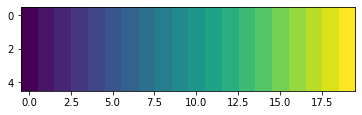

In [8]:
# get cooridinates
plt.imshow(np.reshape(cmins, (5,20)))

In [9]:
cmin = np.reshape(cmins, (5,20))[0,:]
sig = np.reshape(sigs, (5,20))[:,0]

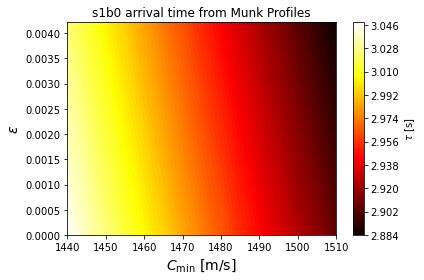

In [70]:
plt.contourf(cmin,sig,s1b0_reshaped, 100, cmap='hot')
plt.colorbar(label='$\\tau$ [s]')
plt.title('s1b0 arrival time from Munk Profiles')
plt.xlabel('$C_\mathrm{min}$ [m/s]', fontsize=14)
plt.ylabel('$\\varepsilon$', fontsize=14)
plt.tight_layout()

plt.savefig('s1b0_munk_arrival_time.png', dpi=300)

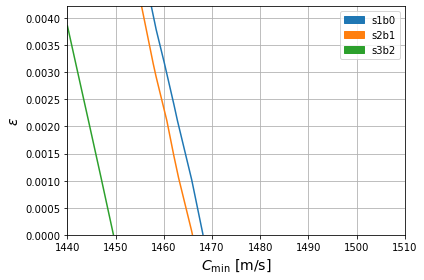

In [75]:
plt.contour(cmin,sig,s1b0_reshaped, [2.9883, 100], colors='C0')
plt.contour(cmin,sig,s2b1_reshaped, [4.6585, 100], colors='C1')
plt.contour(cmin,sig,s3b2_reshaped, [6.61045, 100], colors='C2')

C0_patch = mpatches.Patch(color='C0', label='s1b0')
C1_patch = mpatches.Patch(color='C1', label='s2b1')
C2_patch = mpatches.Patch(color='C2', label='s3b2')
plt.legend(handles=[C0_patch, C1_patch, C2_patch ])
plt.xlabel('$C_\mathrm{min}$ [m/s]', fontsize=14)
plt.ylabel('$\\varepsilon$', fontsize=14)
plt.grid()
plt.tight_layout()

plt.savefig('Munk_all_arrival_times.png', dpi=300)